In [8]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

In [9]:
# Directory containing data and images
in_dir = "data 2/"
# X-ray image
im_name = "vertebra.png"
# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

In [10]:
im_org.shape, im_org.dtype

((998, 800), dtype('uint8'))

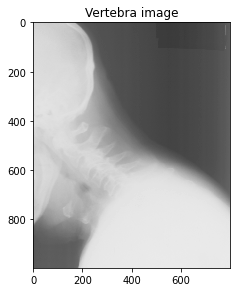

In [11]:
io.imshow(im_org)
plt.title('Vertebra image')
io.show()

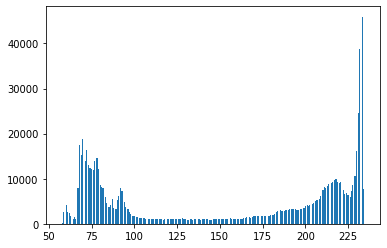

In [12]:
y, x, _ = plt.hist(im_org.ravel(), bins=256)

Definitely bimodal!

In [16]:
min(x), max(x)

(57.0, 235.0)

Not using full 0 - 255 spectrum

In [17]:
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

In [18]:
img_float = img_as_float(im_org)

In [22]:
np.min(img_float), np.max(img_float), np.min(img_float)*255, np.max(img_float)*255

(0.22352941176470587, 0.9215686274509803, 56.99999999999999, 235.0)

In [24]:
img_ubyte = img_as_ubyte(img_float)

In [25]:
np.min(img_ubyte), np.max(img_ubyte)

(57, 235)

In [26]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
	
    # Do something here
    def linearTransform(x):
        return ((max_desired - min_desired)/(max_val - min_val))*(x - min_val) + min_desired
    
    img_out = np.array(list(map(linearTransform, img_float)))

    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

In [28]:
img_stretch = histogram_stretch(im_org)

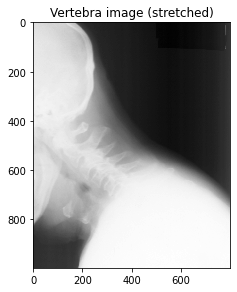

In [33]:
io.imshow(img_stretch)
plt.title('Vertebra image (stretched)')
io.show()

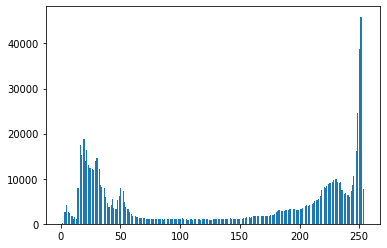

In [35]:
y, x, _ = plt.hist(img_stretch.ravel(), bins=256)

In [36]:
min(x), max(x)

(0.0, 255.0)

In [41]:
def gamma_map(img_in, gamma):
    return img_as_ubyte(np.power(img_as_float(img_in), gamma))

In [42]:
small_gamma = gamma_map(im_org, 0.5)
big_gamma = gamma_map(im_org, 2)

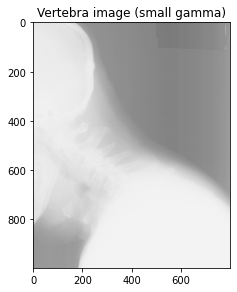

In [43]:
io.imshow(small_gamma)
plt.title('Vertebra image (small gamma)')
io.show()

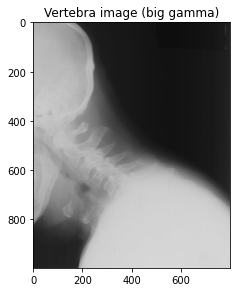

In [44]:
io.imshow(big_gamma)
plt.title('Vertebra image (big gamma)')
io.show()

In [50]:
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    return img_as_ubyte(img_in > thres)

In [58]:
img_thres = threshold_image(im_org, 180)

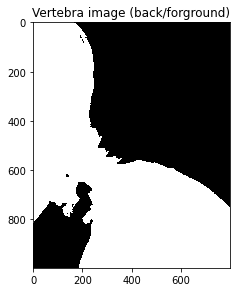

In [59]:
io.imshow(img_thres)
plt.title('Vertebra image (back/forground)')
io.show()

In [65]:
from skimage.filters import threshold_otsu
threshold_otsu(im_org)

148

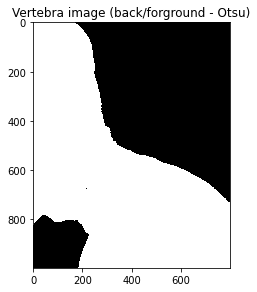

In [66]:
io.imshow(threshold_image(im_org, threshold_otsu(im_org)))
plt.title('Vertebra image (back/forground - Otsu)')
io.show()

In [72]:
# Directory containing data and images
in_dir = "data 2/"
# X-ray image
im_name = "dark_background.png"
# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

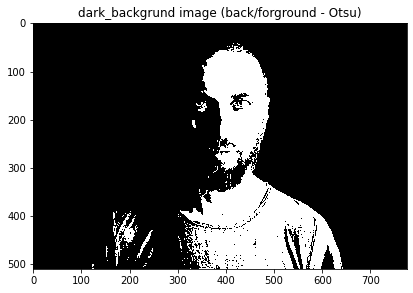

In [73]:
im_org = img_as_float(color.rgb2gray(im_org))
io.imshow(threshold_image(im_org, threshold_otsu(im_org)))
plt.title('dark_backgrund image (back/forground - Otsu)')
io.show()

In [74]:
threshold_otsu(im_org)

0.22480754595588232

In [91]:
# Directory containing data and images
in_dir = "data 2/"
# X-ray image
im_name = "DTUSigns2.jpg"
# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

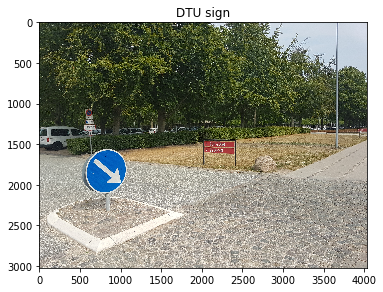

In [92]:
io.imshow(im_org)
plt.title('DTU sign')
io.show()

In [141]:
def detect_dtu_signs(img, rgb_color):
    
    r_comp = im_org[:, :, 0]
    g_comp = im_org[:, :, 1]
    b_comp = im_org[:, :, 2]
    
    match rgb_color:
        case 'blue':
            mask = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
            (b_comp > 180) & (b_comp < 200)
        
        case 'red':
            mask = (b_comp < 80) & (g_comp < 80) & (r_comp > 120)
    
    return mask

In [142]:
blue = detect_dtu_signs(im_org, 'blue')
red = detect_dtu_signs(im_org, 'red')

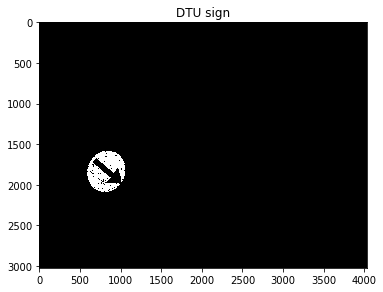

In [143]:
io.imshow(blue)
plt.title('DTU sign')
io.show()

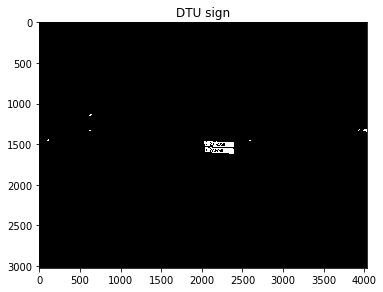

In [144]:
io.imshow(red)
plt.title('DTU sign')
io.show()

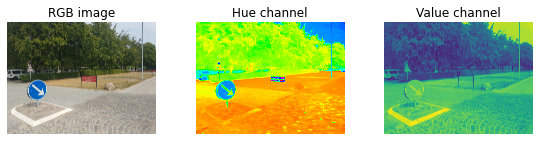

In [145]:
hsv_img = color.rgb2hsv(im_org)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))
ax0.imshow(im_org)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()
io.show()

In [147]:
np.min(hue_img), np.max(hue_img)

(0.0, 0.9986111111111111)

In [246]:
blue_sign = (hue_img > 0.5) & (value_img > 0.7) & (value_img < 0.8)
red_sign = (hue_img > 0.5) & (value_img < 0.7)

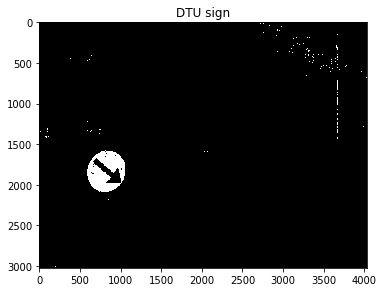

In [247]:
io.imshow(blue_sign)
plt.title('DTU sign')
io.show()

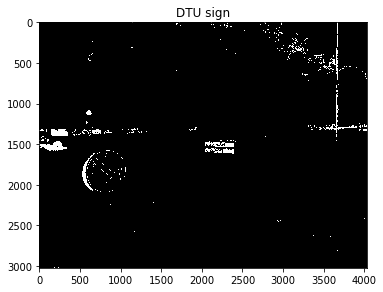

In [248]:
io.imshow(red_sign)
plt.title('DTU sign')
io.show()